In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
# from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
import torch
import torch.nn as nn
import torch.optim as optim
# from lightgbm import LGBMRegressor
# from sklearn.linear_model import LinearRegression
import seaborn as sns
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, VotingRegressor


In [218]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.isnull().sum())
train_data[train_data['Outlet_Identifier']=='OUT010'].head()
train_data.head()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [219]:
train_data_backup = train_data.copy()
test_data_backup = test_data.copy()

In [220]:
item_idenifier = train_data_backup['Item_Identifier'].unique()
item_idenifier_1st_2 = [val[:2] for val in item_idenifier]
item_idenifier_last_2 = [val[-2:] for val in item_idenifier]
print(set(item_idenifier_1st_2))
print(set(item_idenifier_last_2))

{'NC', 'DR', 'FD'}
{'25', '54', '01', '18', '57', '05', '39', '07', '27', '14', '45', '48', '52', '59', '30', '34', '23', '31', '15', '06', '56', '02', '20', '43', '17', '09', '19', '60', '28', '32', '37', '47', '08', '40', '10', '03', '51', '24', '29', '22', '36', '26', '55', '41', '16', '35', '21', '38', '49', '11', '50', '58', '42', '04', '44', '33', '12', '53', '13', '46'}


In [221]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [222]:
# help(sns.histplot)

<Axes: xlabel='Item_Weight', ylabel='Count'>

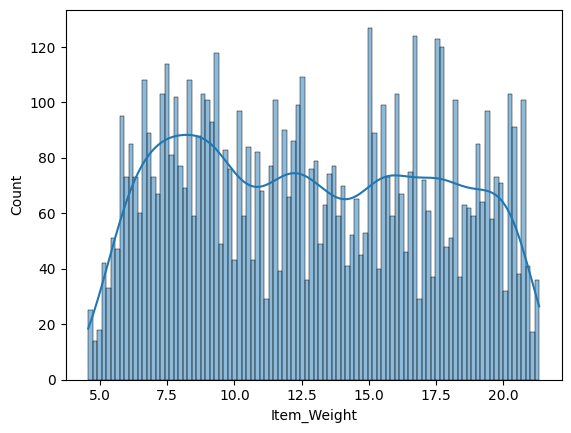

In [223]:
sns.histplot(train_data['Item_Weight'], bins=100, kde= True)

In [224]:
train_data['Item_Weight'] =  train_data.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
print(train_data.isna().sum())
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
print(train_data.isna().sum())

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [225]:
# help(sns.barplot)

<Axes: xlabel='count', ylabel='Outlet_Size'>

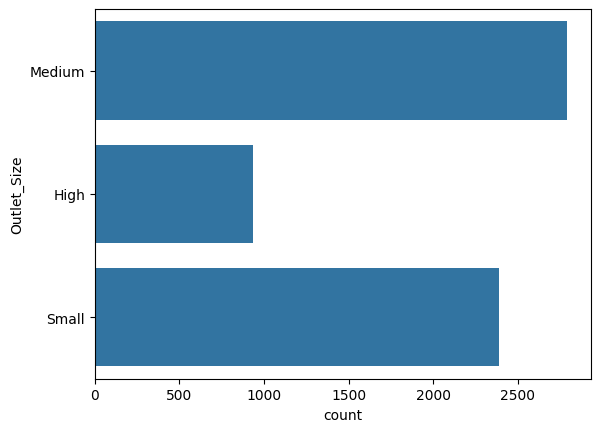

In [226]:
sns.countplot(train_data['Outlet_Size'])

In [227]:
train_data['Outlet_Size'] =  train_data.groupby(['Item_Identifier'])['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
train_data.isna().sum()

C:\Users\debas\AppData\Local\Temp\ipykernel_29576\875898784.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Outlet_Size'] =  train_data.groupby(['Item_Identifier'])['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  7
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: xlabel='count', ylabel='Outlet_Size'>

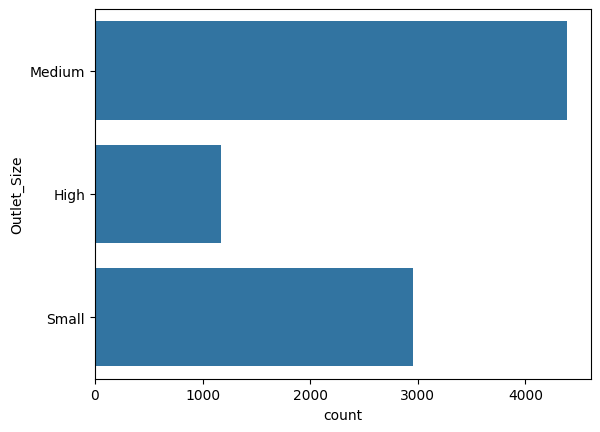

In [228]:
sns.countplot(train_data['Outlet_Size'])

In [229]:
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna('Small')
print(train_data.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [230]:
test_data['Item_Weight'] =  test_data.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
test_data['Outlet_Size'] =  test_data.groupby(['Item_Identifier'])['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
test_data.isna().sum()

C:\Users\debas\AppData\Local\Temp\ipykernel_29576\1308735461.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Outlet_Size'] =  test_data.groupby(['Item_Identifier'])['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))


Item_Identifier               0
Item_Weight                  20
Item_Fat_Content              0
Item_Visibility               0
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Establishment_Year     0
Outlet_Size                  56
Outlet_Location_Type          0
Outlet_Type                   0
dtype: int64

In [231]:
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna('Small')
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [232]:
item_idenifier = train_data['Item_Identifier']
item_idenifier_1st_2 = [val[:2] for val in item_idenifier]
item_idenifier_last_2 = [val[-2:] for val in item_idenifier]
# print(set(item_idenifier_1st_2))
# print(set(item_idenifier_last_2))
train_data['item_identifier_1st_2'] = item_idenifier_1st_2
train_data['item_identifier_last_2'] = item_idenifier_last_2

test_item_idenifier = test_data['Item_Identifier']
test_item_idenifier_1st_2 = [val[:2] for val in test_item_idenifier]
test_item_idenifier_last_2 = [val[-2:] for val in test_item_idenifier]
# print(set(item_idenifier_1st_2))
# print(set(item_idenifier_last_2))
test_data['item_identifier_1st_2'] = test_item_idenifier_1st_2
test_data['item_identifier_last_2'] = test_item_idenifier_last_2

In [233]:
train_data = train_data.drop(columns='Item_Identifier')
test_data = test_data.drop(columns='Item_Identifier')

In [234]:
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [235]:
item_fat_content_mapping = {'Low Fat': 0, 'Regular': 1, 'low fat': 0, 'LF': 0, 'reg': 1}
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].map(item_fat_content_mapping)
print(train_data['Item_Fat_Content'].value_counts())

Item_Fat_Content
0    5517
1    3006
Name: count, dtype: int64


In [236]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].map(item_fat_content_mapping)
test_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    3668
1    2013
Name: count, dtype: int64

<Axes: xlabel='Item_Visibility', ylabel='Count'>

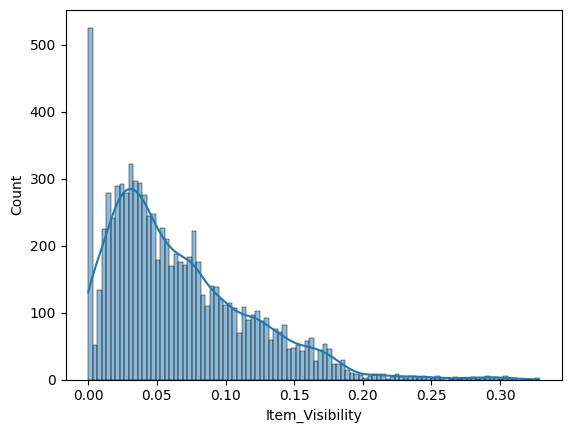

In [237]:
sns.histplot(train_data['Item_Visibility'], bins=100, kde= True)

<Axes: ylabel='Count'>

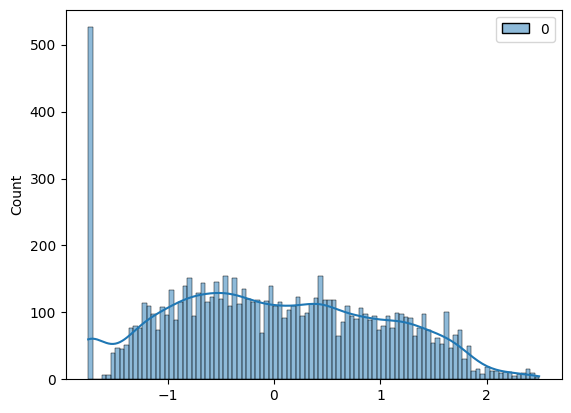

In [238]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
sns.histplot(pt.fit_transform(train_data[['Item_Visibility']]), bins= 100, kde= True)

In [281]:
# sns.scatterplot(train_data, x='Item_Visibility', y='Item_Outlet_Sales')

In [282]:
# sns.scatterplot(train_data, x='Item_Visibility', y='Item_Weight')

<Axes: xlabel='count', ylabel='Item_Type'>

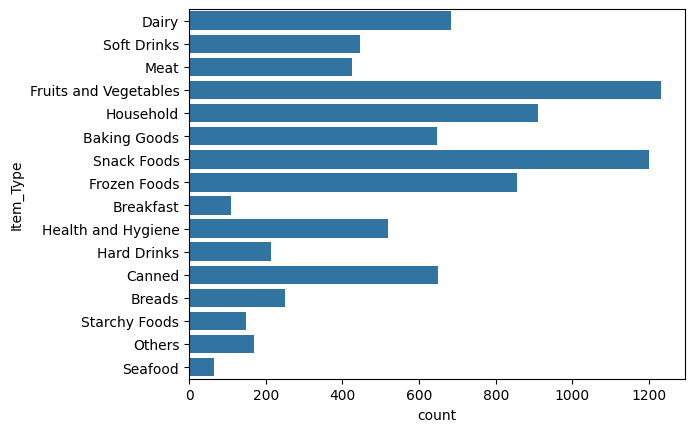

In [241]:
sns.countplot(train_data['Item_Type'])

<Axes: xlabel='Item_MRP', ylabel='Count'>

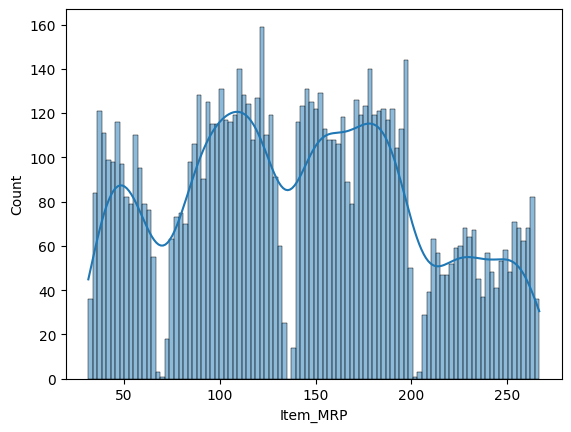

In [242]:
sns.histplot(train_data['Item_MRP'], bins= 100, kde= True)

array([ 16.00424264,  69.50573304, 135.04505877, 165.80841575,
       205.93453354, 240.7105023 , 282.17415736])

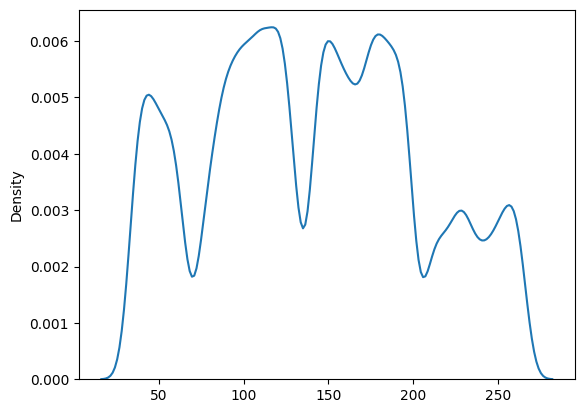

In [243]:
from scipy.signal import argrelextrema

# Sample Item_MRP data
item_mrp = train_data['Item_MRP'].values  

# Compute KDE
kde = sns.kdeplot(item_mrp, bw_adjust=0.5).get_lines()[0].get_data()
x_values, kde_values = kde[0], kde[1]  # Extract KDE curve data

# Find local minima (dips in KDE)
min_indices = argrelextrema(kde_values, np.less)[0]
bin_edges = np.concatenate(([min(x_values)], x_values[min_indices], [max(x_values)]))
bin_edges


In [244]:
bin_labels = [f'bin_{i}' for i in range(len(bin_edges)-1)]
train_data['MRP_bins'] = pd.cut(train_data['Item_MRP'], bins= bin_edges, labels= bin_labels)
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,item_identifier_1st_2,item_identifier_last_2,MRP_bins
0,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,15,bin_5
1,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,01,bin_0
2,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,15,bin_2
3,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,07,bin_3
4,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,19,bin_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FD,22,bin_4
8519,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,FD,36,bin_1
8520,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC,29,bin_1
8521,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD,46,bin_1


In [245]:
test_data['MRP_bins'] = pd.cut(test_data['Item_MRP'], bins= bin_edges, labels= bin_labels)
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,item_identifier_1st_2,item_identifier_last_2,MRP_bins
0,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,58,bin_1
1,8.300,1,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,FD,14,bin_1
2,14.600,0,0.099575,Others,241.7538,OUT010,1998,High,Tier 3,Grocery Store,NC,55,bin_5
3,7.315,0,0.015388,Snack Foods,155.0340,OUT017,2007,High,Tier 2,Supermarket Type1,FD,58,bin_2
4,13.600,1,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,FD,38,bin_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,1,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,FD,58,bin_2
5677,7.600,1,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,FD,47,bin_3
5678,10.000,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,High,Tier 2,Supermarket Type1,NC,17,bin_1
5679,15.300,1,0.000000,Canned,214.6218,OUT017,2007,High,Tier 2,Supermarket Type1,FD,26,bin_4


array([ 3.41485728,  8.20764257, 10.69989092, 14.34240773, 16.93051179,
       18.56005878, 19.99789437, 22.49014272])

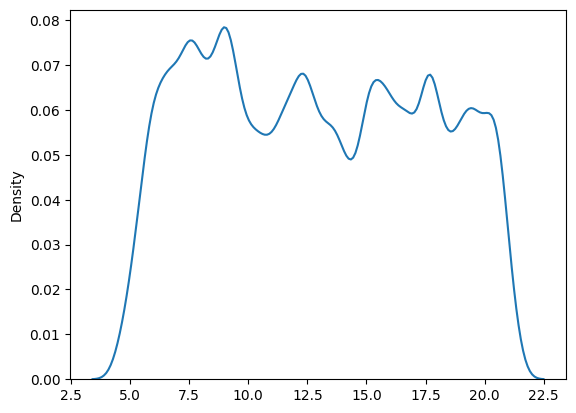

In [246]:
# Sample Item_MRP data
item_weight = train_data['Item_Weight'].values  

# Compute KDE
kde = sns.kdeplot(item_weight, bw_adjust=0.5).get_lines()[0].get_data()
x_values, kde_values = kde[0], kde[1]  # Extract KDE curve data

# Find local minima (dips in KDE)
min_indices = argrelextrema(kde_values, np.less)[0]
bin_edges = np.concatenate(([min(x_values)], x_values[min_indices], [max(x_values)]))
bin_edges

In [247]:
weight_bin_labels = [f'weight_bin_{i}' for i in range(len(bin_edges)-1)]
train_data['Weight_bins'] = pd.cut(train_data['Item_Weight'], bins= bin_edges, labels= weight_bin_labels)
print(train_data.head())
test_data['Weight_bins'] = pd.cut(test_data['Item_Weight'], bins= bin_edges, labels= weight_bin_labels)
print(test_data.head())

   Item_Weight  Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30                 0         0.016047                  Dairy   
1         5.92                 1         0.019278            Soft Drinks   
2        17.50                 0         0.016760                   Meat   
3        19.20                 1         0.000000  Fruits and Vegetables   
4         8.93                 0         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998      Medium   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1     

In [248]:
train_data['Outlet_Age'] = 2025 - train_data['Outlet_Establishment_Year']
test_data['Outlet_Age'] = 2025 - test_data['Outlet_Establishment_Year']

In [249]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,item_identifier_1st_2,item_identifier_last_2,MRP_bins,Weight_bins,Outlet_Age
0,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,15,bin_5,weight_bin_1,26
1,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,01,bin_0,weight_bin_0,16
2,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,15,bin_2,weight_bin_4,26
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,07,bin_3,weight_bin_5,27
4,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,19,bin_0,weight_bin_1,38


<Axes: xlabel='count', ylabel='Outlet_Type'>

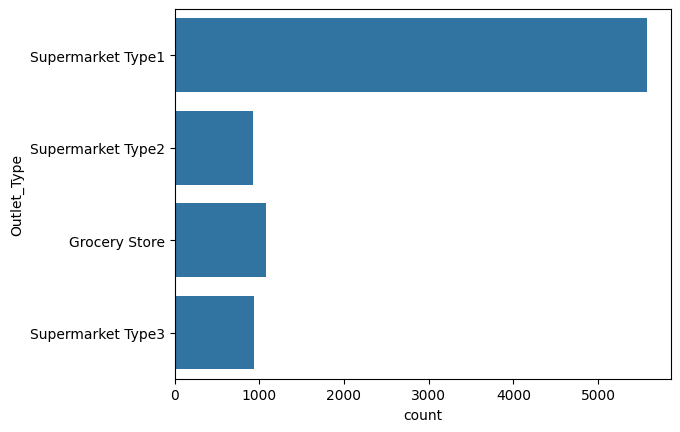

In [250]:
sns.countplot(train_data['Outlet_Type'])

In [251]:
def label_encode(df, column):
    le = LabelEncoder()
    return le.fit_transform(df[column]), le

columns_to_encode = ['item_identifier_1st_2', 'item_identifier_last_2', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'MRP_bins', 'Weight_bins']
train_label_encoder = {}
test_label_encoder = {}
for column in columns_to_encode:
    train_data[column + '_encoded'], train_label_encoder[column] = label_encode(train_data, column=column)
    test_data[column + '_encoded'], test_label_encoder[column] = label_encode(test_data, column=column)


In [252]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Outlet_Age,item_identifier_1st_2_encoded,item_identifier_last_2_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded,MRP_bins_encoded,Weight_bins_encoded
0,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,26,1,14,4,9,1,0,1,5,1
1,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,16,0,0,14,3,1,2,2,0,0
2,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,26,1,14,10,9,1,0,1,2,4
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,...,27,1,6,6,0,1,2,0,3,5
4,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,...,38,2,18,9,1,0,2,1,0,1


In [253]:
train_data= train_data.drop(columns=columns_to_encode + ['Outlet_Establishment_Year'])
test_data = test_data.drop(columns= columns_to_encode + ['Outlet_Establishment_Year'])
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,item_identifier_1st_2_encoded,item_identifier_last_2_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded,MRP_bins_encoded,Weight_bins_encoded
0,9.300,0,0.016047,249.8092,3735.1380,26,1,14,4,9,1,0,1,5,1
1,5.920,1,0.019278,48.2692,443.4228,16,0,0,14,3,1,2,2,0,0
2,17.500,0,0.016760,141.6180,2097.2700,26,1,14,10,9,1,0,1,2,4
3,19.200,1,0.000000,182.0950,732.3800,27,1,6,6,0,1,2,0,3,5
4,8.930,0,0.000000,53.8614,994.7052,38,2,18,9,1,0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,2778.3834,38,1,21,13,1,0,2,1,4,0
8519,8.380,1,0.046982,108.1570,549.2850,23,1,35,0,7,2,1,1,1,1
8520,10.600,0,0.035186,85.1224,1193.1136,21,2,28,8,6,2,1,1,1,1
8521,7.210,1,0.145221,103.1332,1845.5976,16,1,45,13,3,1,2,2,1,0


In [254]:
X = train_data.drop(columns=['Item_Outlet_Sales'])
X_test = test_data.copy()
Y = train_data[['Item_Outlet_Sales']]
columns_to_normalize = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
def normalize_column(df, column):
    normalizer = MinMaxScaler()
    return normalizer.fit_transform(df[[column]])
for column in columns_to_normalize:
    X[column + '_normalize'] = normalize_column(train_data, column= column)
    X_test[column + '_normalize'] = normalize_column(test_data, column= column)
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Age,item_identifier_1st_2_encoded,item_identifier_last_2_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded,MRP_bins_encoded,Weight_bins_encoded,Item_Weight_normalize,Item_Visibility_normalize,Item_MRP_normalize,Outlet_Age_normalize
0,9.30,0,0.016047,249.8092,26,1,14,4,9,1,0,1,5,1,0.282525,0.048866,0.927507,0.416667
1,5.92,1,0.019278,48.2692,16,0,0,14,3,1,2,2,0,0,0.081274,0.058705,0.072068,0.000000
2,17.50,0,0.016760,141.6180,26,1,14,10,9,1,0,1,2,4,0.770765,0.051037,0.468288,0.416667
3,19.20,1,0.000000,182.0950,27,1,6,6,0,1,2,0,3,5,0.871986,0.000000,0.640093,0.458333
4,8.93,0,0.000000,53.8614,38,2,18,9,1,0,2,1,0,1,0.260494,0.000000,0.095805,0.916667


In [255]:
X = X.drop(columns= columns_to_normalize)
X_test = X_test.drop(columns= columns_to_normalize)


In [256]:
y_normalizer = MinMaxScaler((0,1))
y_normalize = y_normalizer.fit_transform(Y)
y_normalize

array([[0.28358666],
       [0.03141895],
       [0.15811486],
       ...,
       [0.08885035],
       [0.13883505],
       [0.05610527]])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X,y_normalize, train_size= 0.8, random_state=42)
rf_model = RandomForestRegressor(n_estimators=500, random_state=4)
xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.01, random_state=5)
lgbm_model = lgb.LGBMRegressor(n_estimators=400, learning_rate=0.01, random_state=6)
gg_model=GradientBoostingRegressor(n_estimators=500, learning_rate= 0.01, random_state= 20)

# Train models
rf_model.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)
lgbm_model.fit(x_train, y_train)
gg_model.fit(x_train, y_train)

rf_preds = rf_model.predict(x_val)
xgb_preds = xgb_model.predict(x_val)
lgbm_preds = lgbm_model.predict(x_val)
gg_pred = gg_model.predict(x_val)

print(f'RMSE rf_model:{np.sqrt(mean_squared_error(rf_model.predict(x_val), y_val))}')
print(f'RMSE xgb_model:{np.sqrt(mean_squared_error(xgb_model.predict(x_val), y_val))}')
print(f'RMSE lgbm_model:{np.sqrt(mean_squared_error(lgbm_model.predict(x_val), y_val))}')
print(f'RMSE gg_model:{np.sqrt(mean_squared_error(gg_model.predict(x_val), y_val))}')

ensemble_preds = (0/10)*xgb_preds  + (5/10)*gg_pred  + (0/10)*rf_preds + (5/10)*lgbm_preds

print(f'RMSE: {np.sqrt(mean_squared_error(ensemble_preds, y_val))}')


c:\Users\debas\OneDrive\Desktop\files\python env\stock_analysis\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\debas\OneDrive\Desktop\files\python env\stock_analysis\Lib\site-packages\lightgbm\basic.py:374: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 14
[LightGBM] [Info] Start training from score 0.166166


c:\Users\debas\OneDrive\Desktop\files\python env\stock_analysis\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


RMSE rf_model:0.08287179612953412
RMSE xgb_model:0.07887511662757982
RMSE lgbm_model:0.0787365393893081
RMSE gg_model:0.07847668465064567
RMSE: 0.07830335530586703


In [260]:
rf_preds_test = rf_model.predict(X_test)
xgb_preds_test = xgb_model.predict(X_test)
lgbm_preds_test = lgbm_model.predict(X_test)
gg_pred_test = gg_model.predict(X_test)

ensemble_preds_test =  abs((0/10)*xgb_preds_test + (5/10)*gg_pred_test + (0/10)*rf_preds_test + (5/10)*lgbm_preds_test)

ensemble_preds_test_actual_scale = y_normalizer.inverse_transform(ensemble_preds_test.reshape(-1,1))
print(ensemble_preds_test_actual_scale)
y_normalizer.inverse_transform(rf_preds_test.reshape(-1,1))

[[1627.84170882]
 [1373.66142116]
 [ 681.2251968 ]
 ...
 [1945.90422306]
 [3834.05182118]
 [1296.72035336]]


array([[1765.162302 ],
       [1345.3407804],
       [ 627.070414 ],
       ...,
       [2137.0235864],
       [4432.9323532],
       [1361.9112108]])

In [261]:
submission_df = test_data_backup[['Item_Identifier', 'Outlet_Identifier']]
submission_df['Item_Outlet_Sales'] = ensemble_preds_test_actual_scale
# submission_df['Item_Outlet_Sales'] = (test_predictions.cpu().numpy().flatten()+test_predictions_M)/2
submission_df.set_index('Item_Identifier', inplace=True)
submission_df

C:\Users\debas\AppData\Local\Temp\ipykernel_29576\1554249350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['Item_Outlet_Sales'] = ensemble_preds_test_actual_scale


,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,1627.841709
FDW14,OUT017,1373.661421
NCN55,OUT010,681.225197
FDQ58,OUT017,2474.266188
FDY38,OUT027,6579.534820
...,...,...
FDB58,OUT046,2133.765371
FDD47,OUT018,2572.594791
NCO17,OUT045,1945.904223


In [262]:
submission_df.to_csv('submission.csv')

In [272]:
# device = torch.device('xpu' if torch.xpu.is_available() else 'cpu')
# print(f"Using device: {device}")


In [273]:
# X

In [274]:
# X_numerical_column = [col + '_normalize' for col in columns_to_normalize]
# X_categorical_column = [col + '_encoded' for col in columns_to_encode] + ['Item_Fat_Content']
# X_categorical_column
# X_numerical = X[X_numerical_column].values
# X_categorical = X[X_categorical_column].values

In [275]:
# X_train_num, X_test_num, X_train_cat, X_test_cat, y_train, y_test = train_test_split(
#     X_numerical, X_categorical, y_normalize, test_size=0.2, random_state=42
# )

# # Convert data to PyTorch tensors
# X_train_num = torch.tensor(X_train_num, dtype=torch.float32).to(device)
# X_test_num = torch.tensor(X_test_num, dtype=torch.float32).to(device)
# X_train_cat = torch.tensor(X_train_cat, dtype=torch.long).to(device)  # Combined categorical tensor
# X_test_cat = torch.tensor(X_test_cat, dtype=torch.long).to(device)
# y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
# y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

In [276]:
# class MixedNN(nn.Module):
#     def __init__(self, num_numerical_features, cat_unique_vals, embed_dims):
#         super(MixedNN, self).__init__()
#         # Embedding layers for each categorical column
#         self.embeddings = nn.ModuleList([
#             nn.Embedding(unique_vals, embed_dim) for unique_vals, embed_dim in zip(cat_unique_vals, embed_dims)
#         ])

#         # Fully connected layers for numerical + embedded features
#         total_embed_dim = sum(embed_dims)  # Total embedding dimensions combined
#         self.fc1 = nn.Linear(num_numerical_features + total_embed_dim, 256, bias= False)  # Increased neurons
#         self.fc2 = nn.Linear(256,128, bias= False)
#         self.fc3 = nn.Linear(128, 64, bias= False)  # Additional layer with fewer neurons
#         self.fc4 = nn.Linear(64, 32, bias= False)   # Reduced neurons in deeper layers
#         self.fc5 = nn.Linear(32, 1, bias= False)    # Output layer
#         self.dropout = nn.Dropout(p=0.2)  # Dropout layer with 20% probability

#         # self.relu = nn.ReLU()
#         # self.relu = nn.LeakyReLU(negative_slope=0.01)
#         self.relu = nn.GELU()
#         # self.fc_projection = nn.Linear(38, 128)

#         # Apply Xavier initialization
#         nn.init.xavier_uniform_(self.fc1.weight)
#         nn.init.xavier_uniform_(self.fc2.weight)
#         nn.init.xavier_uniform_(self.fc3.weight)
#         nn.init.xavier_uniform_(self.fc4.weight)
#         nn.init.xavier_uniform_(self.fc5.weight)

#     def forward(self, x_numerical, x_categorical):
#         # Embed each categorical column
#         embedded = [self.embeddings[i](x_categorical[:, i]) for i in range(x_categorical.size(1))]
#         # Concatenate numerical and embedded features
#         x = torch.cat([x_numerical] + embedded, dim=1)
#         # x_residual = x

#         # Pass through fully connected layers with dropout
#         x = self.relu(self.fc1(x))
#         x = self.dropout(x)  # Dropout after the first layer
#         x = self.relu(self.fc2(x))
#         # print(x.shape, x_residual.shape)
#         # x_residual = self.fc_projection(x_residual)
#         # x = x + x_residual
#         x = self.dropout(x)  # Dropout after the second layer
#         x = self.relu(self.fc3(x))
#         # x = self.fc4(x)  # Final output layer (regression output)
#         x = self.dropout(x)
#         x = self.relu(self.fc4(x))
#         x = self.fc5(x)
#         return x
    
# # Initialize the model
# num_numerical_features = X_train_num.shape[1]
# cat_unique_vals = [len(np.unique(X[col])) for col in X_categorical_column]
# print('cat_unique_vals:', cat_unique_vals)
# # embed_dims = [2, 3, 3, 4, 4]  # Example embedding dimensions for each categorical column
# embed_dims = []
# for column in X_categorical_column:
#     # print(f'{column}: {len(X[column].unique())}')
#     embed_dims.append(len(X[column].unique()))
# print('embed_dims:', embed_dims)

# model = MixedNN(num_numerical_features, cat_unique_vals, embed_dims).to(device)

# # Define optimizer and loss function
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay= 0.00001)
# # scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-5)

# criterion = nn.MSELoss()


# # Train the model
# epochs = 70
# batch_size = 128

# for epoch in range(epochs):
#     model.train()
#     permutation = torch.randperm(X_train_num.size(0))

#     for i in range(0, X_train_num.size(0), batch_size):
#         indices = permutation[i:i + batch_size]
#         batch_num = X_train_num[indices]
#         batch_cat = X_train_cat[indices]
#         batch_y = y_train[indices]

#         # Zero the gradients
#         optimizer.zero_grad()

#         # Forward pass
#         outputs = model(batch_num, batch_cat)

#         # Compute L1 regularization term
#         l1_lambda = 1e-6
#         l1_reg = sum(torch.abs(param).sum() for param in model.parameters())

#         # Compute loss
#         loss = criterion(outputs, batch_y) + l1_lambda * l1_reg


#         # Backward pass and update
#         loss.backward()
#         optimizer.step()
#     # scheduler.step()


#     print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# # Evaluate the model
# model.eval()
# with torch.no_grad():
#     predictions = model(X_test_num, X_test_cat)
#     rmse = np.sqrt(mean_squared_error(y_test.cpu().numpy(), predictions.cpu().numpy()))
#     print(f"Root Mean Squared Error on Test Set: {rmse}")

In [277]:
# print(X_test_num.shape, X_test_cat.shape, X_test[X_numerical_column].values.shape, X_test[X_categorical_column].values.shape)

In [278]:
# with torch.no_grad():
#     test_pred = model(torch.tensor(X_test[X_numerical_column].values, dtype=torch.float32).to(device), torch.tensor(X_test[X_categorical_column].values, dtype=torch.long).to(device))
# test_pred
# test_pred = abs(test_pred.cpu().numpy())
# test_pred_actual_scale = y_normalizer.inverse_transform(test_pred.reshape(-1,1))
# test_pred_actual_scale

In [279]:
# submission_df = test_data_backup[['Item_Identifier', 'Outlet_Identifier']]
# submission_df['Item_Outlet_Sales'] = test_pred_actual_scale
# # submission_df['Item_Outlet_Sales'] = (test_predictions.cpu().numpy().flatten()+test_predictions_M)/2
# submission_df.set_index('Item_Identifier', inplace=True)
# submission_df

In [280]:
# submission_df.to_csv('submission.csv')